In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
%matplotlib inline
import matplotlib.mlab as mlab
from scipy import stats 

In [2]:
rate = pd.read_csv('data.csv')
data = pd.read_csv('st1.csv')

In [3]:
size = int(len(data) * 0.715)

In [4]:
train, valid = data[0:size], data[size:size+52]

In [5]:
#positive and negative weight features for 3 years
features = ['damp','cramps','alcohol','wheezing','sharp_pain','weekend','chill','spit','Christmas_eve',
            'lung_cancer','hanging','endocrine','cervical_cancer','cellulitis','thrombosis',
            'suicide_methods','chemotherapy','sore_throat','birthday','goodbye_letter','cut_wrist',
            'Christian_Cross','after_death','abdominal_pain','life_expectancy','nausea','neoplasms',
            'anxiety','emergency','funeral_songs','deicide','drowning','freeze','liver_disease',
            'falls','poison','preterm','obtunded','exsanguination','mood_disorder','perinatal_mortality',
            'bowel_cancer','narcotics','mental_confusion','physical_weakness','death_symbol',
            'crucifixion','drug_overdose','memorial_service','death_anxiety','sleep_longer',
            'physical_inactivity','desperate','lethal_injection','rheumatiod','asthma','death_row',
            'endocrine_disease','palpitation','purple_feet','pandemia','congenital_disease',
            'radiotherapy','rape','dream_death','funeral_director','domestic_violence','insulation',
            'weak_pulse','panic_disorder','funeral_arrangements','menopausal','pulmonary','energy_prices',
            'genitourinary', 'bowel_disease','aortic','self_harming','cholesterol','gun_shot','tinnitus',
            'neuropathic_pain','mortality','poor_diet','dietary','pathophysiological','condolences',
            'funeral_ceremony','blood_viscosity','nervosa','toxin','homelessness','lonely','opiates',
            'ischaemic_heart_disease','deprivation','high_cholesterol','pain_medicine','overcrowded',
            'suicide','carbon_monoxide_poisoning','convulsion','cremation','dropsy','coffin','palliative_care',
            'sweating','funeral_home','hypothermia','hypertension','drug_therapy','swine_flu','snow',
            'death_register','aneurysm','death_certificate','myocardial','ischaemic','births_deaths',
            'metabolic','violence','funeral_news','funeral_services','chesty_cough','hospital','bloated',
            'bronchitis','January','pneumonia','surgery','air_crash','death','trachea','food_poisoning',
            'housing_tenure','opioids','tombstones','winter','home_death','purple_hands','bulimia_nervosa',
            'tornado','appetite_loss','strangulation','emergency_admissions','influenza','sendentary',
            'urbanicity','lung_disease','blotchy_hands','stillbirth','suffocation','funeral_flower',
            'vomiting','death_notice','myocardial_infarction','feet_swell','Major_Depressive_Disorder',
            'fester','Pulmonary_embolism','migration','funeral','itch','pregnancy','morphine','neonatal',
            'emigration','knife','tuberculosis','car_ownership','bronchitis_cough','burial','funeral_dresses',
            'falling','slime','metabolic_disease','restlessness','heart_disease','skin_peeling','psychiatric',
            'despair','poverty','citalopram','energy_cost','alcohol_abuse','aids','ankles_swell','assualt',
            'December','paperdoll','Alzheimers','infant_mortality','delusion','death_rattle','rhinitis',
            'homicide','heart_failure','infarction','air_pollution','warm','dry_cough','mumble',
            'Christmas','life_review','ultrasound','New_Years_eve'
           ]

y_train = rate['weeklydeathrate'][0:size].values
x_train = train[features]
x_valid = valid[features]
y_valid = rate['weeklydeathrate'][size:size+52].values

In [6]:
#index of test data set
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('data.csv',parse_dates=['date'],index_col=0,date_parser=dateparse)
L=data.index[size:size+52]

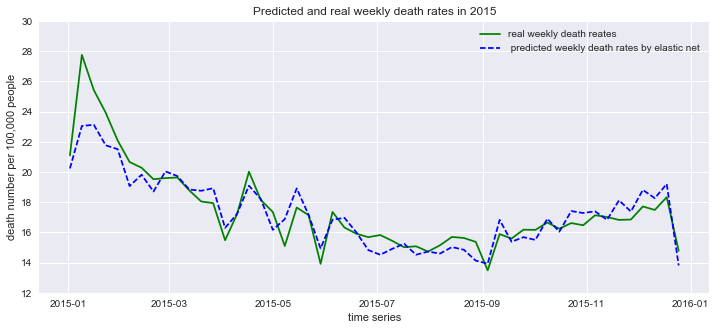

In [7]:
#forecast of weekly death rates in England
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.149, l1_ratio=0.5,max_iter=10000)
y_pred_enet = enet.fit(x_train, y_train).predict(x_valid)

x = L
z = y_valid
m = y_pred_enet
fig = plt.figure(figsize=(12,5))
plt.plot(x,z,label='real weekly death reates',color='green')
plt.plot(x,m,label=' predicted weekly death rates by elastic net',color="blue",linestyle='--')
plt.xlabel("time series")
plt.ylabel("death number per 100,000 people")
plt.title("Predicted and real weekly death rates in 2015")
from pylab import *
ylim(12,30)
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, make_scorer
mse = mean_squared_error(y_valid, y_pred_enet)
RMSE=np.sqrt(mse)
RMSE

1.0957741939682601

In [9]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_valid, y_pred_enet, sample_weight=None, multioutput='uniform_average')
MAE

0.80021075456436241

In [10]:
from sklearn.utils import check_array
from sklearn.utils.validation import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean((np.abs((y_true - y_pred) / y_true)) * 100)
mape = mean_absolute_percentage_error(y_valid, y_pred_enet)
mape

4.3896543069309608

In [11]:
np.corrcoef(y_valid, y_pred_enet)

array([[ 1.        ,  0.92502828],
       [ 0.92502828,  1.        ]])